# Introduction to Machine Learning

## Table of Contents
1. [The General Concept of Machine Learning](#1-the-general-concept-of-machine-learning)
2. [Types of Learning and Basic Terminology](#2-types-of-learning-and-basic-terminology)
3. [Supervised Learning](#3-supervised-learning)
   3.1 [Classification](#31-classification)
   3.2 [Regression](#32-regression)
4. [Unsupervised Learning](#4-unsupervised-learning)
   4.1 [Dimensionality Reduction](#41-dimensionality-reduction)
5. [Reinforcement Learning](#5-reinforcement-learning)
6. [Machine Learning Workflow](#6-machine-learning-workflow)
7. [Summary and Additional Resources](#7-summary-and-additional-resources)

## 1. The General Concept of Machine Learning

Machine learning is a subfield of artificial intelligence that enables computers to learn from data and improve their performance without explicit programming. The goal is to develop models and algorithms for making predictions or decisions based on data.

### Key Points:
- Learns from data to improve performance
- Used for predictions and decision-making
- Wide range of applications (e.g., image recognition, NLP, fraud detection)

### Example Applications:
- Spam filters
- Voice recognition software
- Movie recommendations
- Mobile check deposits
- Estimated meal delivery times
- Self-driving cars (in development)
- Medical applications (e.g., skin cancer detection, protein structure prediction)

```python

In [1]:

# Simple example of a machine learning application

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample emails
emails = [
    "Get rich quick! Buy now!",
    "Meeting scheduled for 3 PM",
    "Limited time offer! Don't miss out!",
    "Project report due tomorrow"
]

labels = ["spam", "not spam", "spam", "not spam"]

# Create feature vectors
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(emails)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(features, labels)

# Predict a new email
new_email = ["Free gift waiting for you!"]
new_email_features = vectorizer.transform(new_email)
prediction = classifier.predict(new_email_features)

print(f"The email is classified as: {prediction[0]}")




The email is classified as: not spam


```

## 2. Types of Learning and Basic Terminology

There are three main types of machine learning:

1. Supervised Learning
2. Unsupervised Learning
3. Reinforcement Learning

Each type has its own characteristics and use cases, which we'll explore in the following sections.

## 3. Supervised Learning

Supervised learning involves training models on labeled data to make predictions on new, unseen data.

### 3.1 Classification

Classification is a supervised learning task where the goal is to predict categorical labels or classes for given inputs.

#### Example: Binary Classification (Spam Filter)

```python

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Larger dataset
emails = [
    "Get rich quick! Buy now!",
    "Meeting scheduled for 3 PM",
    "Limited time offer! Don't miss out!",
    "Project report due tomorrow",
    "Congratulations! You've won a prize!",
    "Reminder: Team lunch at 12:30",
    "Exclusive deal just for you!",
    "Please review the attached document",
    "You're our lucky winner!",
    "Updates on the ongoing project"
]

labels = ["spam", "not spam", "spam", "not spam", "spam", 
          "not spam", "spam", "not spam", "spam", "not spam"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.3, random_state=42)

# Create feature vectors
vectorizer = CountVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_features)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.33

Classification Report:
              precision    recall  f1-score   support

    not spam       0.00      0.00      0.00         2
        spam       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



c:\Users\ghadf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ghadf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ghadf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


```

### 3.2 Regression

Regression is a supervised learning task where the goal is to predict continuous values for given inputs.

#### Example: Linear Regression (House Price Prediction)

```python

Mean Squared Error: 4089588218.84
R-squared Score: 0.93


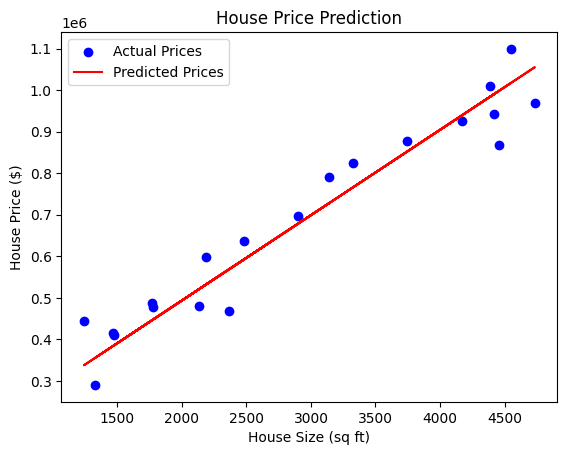

In [3]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
np.random.seed(42)
house_sizes = np.random.randint(1000, 5000, 100)
house_prices = 100000 + 200 * house_sizes + np.random.normal(0, 50000, 100)

# Reshape the data
X = house_sizes.reshape(-1, 1)
y = house_prices

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($)')
plt.title('House Price Prediction')
plt.legend()
plt.show()




```

## 4. Unsupervised Learning

Unsupervised learning involves finding patterns or structures in unlabeled data.

### 4.1 Dimensionality Reduction

Dimensionality reduction is a technique used to reduce the number of features while retaining most of the relevant information.

#### Example: Principal Component Analysis (PCA)

```python

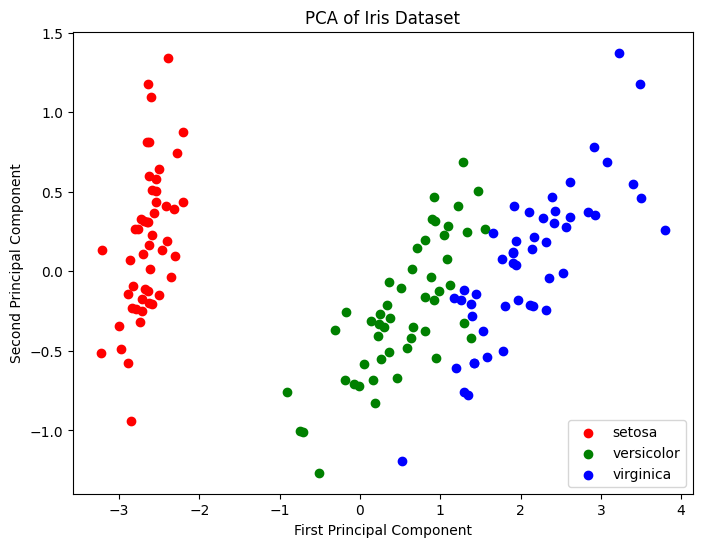

Explained Variance Ratio: [0.92461872 0.05306648]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i, c in zip(range(3), colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=c, label=iris.target_names[i])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

```

## 5. Reinforcement Learning

Reinforcement learning involves an agent learning to make decisions by interacting with an environment and receiving rewards or penalties.

### Example: Simple Q-learning (Grid World)

```python

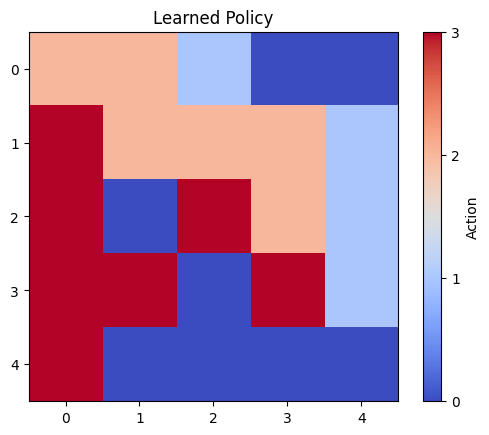

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid world
grid_size = 5
goal_state = (grid_size - 1, grid_size - 1)
obstacle_states = [(1, 1), (2, 2), (3, 3)]

# Initialize Q-table
q_table = np.zeros((grid_size, grid_size, 4))  # 4 actions: up, right, down, left

# Define hyperparameters
alpha = 0.1  # learning rate
gamma = 0.9  # discount factor
epsilon = 0.1  # exploration rate

# Define actions
actions = [(0, -1), (1, 0), (0, 1), (-1, 0)]  # up, right, down, left

def get_next_state(state, action):
    next_state = (state[0] + action[0], state[1] + action[1])
    if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
        return state
    return next_state

def get_reward(state):
    if state == goal_state:
        return 1
    elif state in obstacle_states:
        return -1
    else:
        return 0

# Training loop
num_episodes = 1000

for episode in range(num_episodes):
    state = (0, 0)
    
    while state != goal_state:
        # Choose action
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(4)
        else:
            action = np.argmax(q_table[state])
        
        # Take action and observe next state and reward
        next_state = get_next_state(state, actions[action])
        reward = get_reward(next_state)
        
        # Update Q-value
        q_table[state][action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state][action])
        
        state = next_state

# Visualize the learned policy
policy = np.argmax(q_table, axis=2)
plt.imshow(policy, cmap='coolwarm')
plt.colorbar(ticks=[0, 1, 2, 3], label='Action')
plt.title('Learned Policy')
plt.show()

```
## 5. Deployment and monitoring through Streamlit (as example, run streamlit run ../app/app.py or app/app.py to see)
```

In [14]:
%%writefile ../app/app.py
# app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load and prepare the data
data = load_breast_cancer()


#convert to dataframe for checking
df = pd.DataFrame(data.data, columns=data.feature_names)
# print(df.head())
# df['target'] = data.target
# print(df.head())


X, y = data.data, data.target
feature_names = data.feature_names

# Split the data and train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Streamlit app
st.title('Breast Cancer Prediction App')

st.write("""
This app predicts whether a breast mass is benign or malignant based on the measurements provided.
Please enter the values for each feature to get a prediction.
""")

# Create input fields for each feature
input_features = {}

for feature in feature_names:
    input_features[feature] = st.slider(
        f"{feature}",
        float(X[:, feature_names.tolist().index(feature)].min()),
        float(X[:, feature_names.tolist().index(feature)].max()),
        float(X[:, feature_names.tolist().index(feature)].mean())
    )

# Create a prediction button
if st.button('Predict'):
    # Prepare the input data
    input_data = np.array(list(input_features.values())).reshape(1, -1)
    input_data_scaled = scaler.transform(input_data)
    
    # Make prediction
    prediction = model.predict(input_data_scaled)
    probability = model.predict_proba(input_data_scaled)

    # Display the result
    st.subheader('Prediction:')
    if prediction[0] == 0:
        st.write('The breast mass is predicted to be: **Benign**')
    else:
        st.write('The breast mass is predicted to be: **Malignant**')
    
    st.subheader('Prediction Probability:')
    st.write(f'Benign: {probability[0][0]:.2f}')
    st.write(f'Malignant: {probability[0][1]:.2f}')

# Display feature importances
st.subheader('Feature Importances:')
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

st.bar_chart(feature_importance.set_index('feature'))

# Instructions for running the app
st.sidebar.header('How to run this app:')
st.sidebar.markdown("""
1. Save this code as `app.py`
2. Install required libraries:
   ```
   pip install streamlit pandas numpy scikit-learn
   ```
3. Run the app:
   ```
   streamlit run app.py
   ```
4. The app will open in your default web browser
""")

Overwriting ../app/app.py


```

## 6. Machine Learning Workflow

The general workflow for machine learning projects includes:

1. Data collection and preparation
2. Feature extraction
3. Model selection and training
4. Evaluation
5. Deployment and monitoring

```python

In [7]:
# Example of a simple machine learning workflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer

# 1. Data collection and preparation
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Feature extraction (in this case, we're using all features)
# 3. Model selection and training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 4. Evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114




## 7. Summary and Additional Resources

This notebook covered the following topics:
- The general concept of machine learning
- Types of learning: supervised, unsupervised, and reinforcement learning
- Supervised learning: classification and regression
- Unsupervised learning: dimensionality reduction
- Reinforcement learning
- Machine learning workflow

For further learning, consider exploring these resources:
- [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)
- [Coursera: Machine Learning by Andrew Ng](https://www.coursera.org/learn/machine-learning)
- [Machine Learning Mastery](https://machinelearningmastery.com/)
- [Towards Data Science](https://towardsdatascience.com/)